# Tarea 2. Redes Bayesianas.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/1/18/Bayes%27_Theorem_MMB_01.jpg" width="400px" height="300px" />

En esta segunda tarea vas a repasar algunos aspectos de las redes Bayesianas que vimos en clase, y también vas a profundizar más en ciertos tópicos adicionales de interés.

Para los ejercicios teóricos la orientación es que seas lo más explícit@ posible. Además, cuando se te pida demostrar, que tu exposición sea clara y te apoyes de la escritura matemática con $\LaTeX$.

Recuerda además que ante cualquier duda, me puedes contactar al correo esjimenezro@iteso.mx.

<p style="text-align:right;"> Imagen recuperada de: https://upload.wikimedia.org/wikipedia/commons/1/18/Bayes%27_Theorem_MMB_01.jpg.</p>

___

# 1. Modelo Naïve Bayes (Bayes ingenuo)

Un modelo extremandamente sencillo, pero aún así muy importante es el modelo Naïve Bayes. Su simplicidad radica en las suposiciones de independencia que realiza (que son fuertes y pueden no llegar a satisfacerse para determinadas aplicaciones). Por otra parte, su importancia viene de que usualmente se usa como benchmark para comparar otras propuestas.

El model Naïve Bayes está representado por el siguiente grafo:

In [1]:
from IPython.display import Image

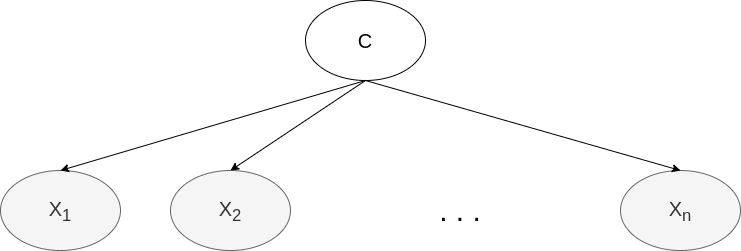

In [2]:
Image(filename='figures/NaiveBayes.png')

donde, comúnmente, la variable $C$ es una variable cuyo valor queremos inferir a partir de las características observadas $X_1,\dots, X_n$.

Usualmente, se utiliza el anterior modelo para esquemas de **clasificación**, donde $C$ ($\mathrm{Val}(C)=\{c^1, \dots, c^k\}$) es la categoria en la que se quieren clasificar los datos.

1. ¿Qué independencias locales codifica el modelo Naïve Bayes?

2. ¿Cuál es la factorización la distribución $P(C,X_1,\dots,X_n)$ inducida por el grafo?

3. Suponga que tenemos cierta situación, la cual modelamos como un problema de **clasificación binaria** ($\mathrm{Val}(C)=\{c^1, c^2\}$) y decidimos utilizar el modelo Naïve Bayes. Una vez entrenamos el modelo, tenemos una nueva observación de las variables $(x_1,\dots,x_n)$ y queremos saber a qué categoría pertenece. Para solucionar el problema anterior, demuestre que:

  $$\frac{P(C=c^1 | x_1, \dots, x_n)}{P(C=c^2 | x_1, \dots, x_n)} = \frac{P(C=c^1)}{P(C=c^2)} \prod_{i=1}^{n} \frac{P(x_i|C=c^1)}{P(x_i|C=c^2)}.$$

# 2. Nuestra primera red Bayesiana

Considere el siguiente grafo que modela aspectos de salud de una persona:

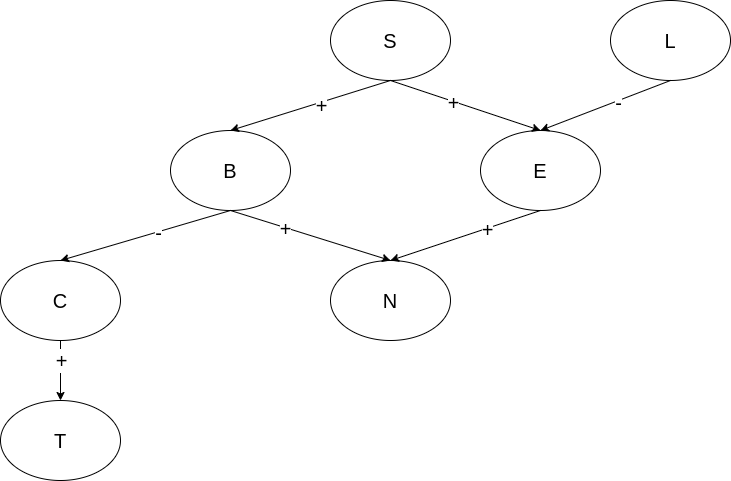

In [4]:
Image(filename='figures/Exercise.png')

donde las variables aleatorias son:

- $S$: la persona tiene habitos saludables;
- $L$: la persona tiene poco tiempo libre;
- $E$: la persona hace ejercicio;
- $B$: la persona tiene buenos hábitos alimenticios;
- $C$: la persona tiene altos niveles de colesterol;
- $N$: la persona se encuentra en un rango de peso normal;
- $T$: test de alto colesterol positivo.

Suponemos que todas las VA anteriormente descritas son binarias (una VA $X$ es binaria si $\mathrm{Val}(X)=\{x^0, x^1\}$), done el superíndice $1$ representa la presencia de la descripción de la VA y el superíndice $0$ representa la ausencia. Por ejemplo $B=b^1$ representa que la persona tiene buenos hábitos alimenticios, mientras que $B=b^0$ representa que la persona no tiene buenos hábitos alimenticios.

En este momento, no sabemos los valores de las distribuciones condicionales, pero sabemos cómo afecta cada nodo a sus nodos hijos *cualitativamente* mediante los signos en los arcos del grafo. Es decir, un arco con el signo $+$ significa que una variable afecta positivamente a otra y viceversa. Por ejemplo, del grafo podemos ver que:
- Si la persona tiene hábitos saludables es más probable que haga ejercicio.
- Si la persona tiene buenos hábitos alimenticios es menos probable que tenga altos niveles de colesterol.

**Descarga de SAMIAM y prerrequisitos**

Para este ejercicio será necesario el uso del software SAMIAM (Sensivity Analysis, Modeling, Inference and More) el cual fue desarrollado por "the Automated Reasoning Group" de UCLA. 

Este software nos provee una interfaz gráfica para manipular modelos gráficos probabilísticos en cualquier sistema operativo (Windows, Mac o Linux). Tiene funcionalidades para aprendizaje e inferencia en modelos gráficos, sin embargo, nosotros solo la usaremos para manipular una red e inferir sus probabilidades marginales.

Puedes descargar el software, de manera gratuita, en [este enlace](http://reasoning.cs.ucla.edu/samiam/index.php). Hay distintos archivos para cada sistema operativo, así que elige el apropiado para el tuyo.

El único prerrequisito para correr SAMIAM es un JRE y un JDK de java. De manera que si cuando corras SAMIAM obtienes errores de que no se encuentran ejecutables de java, debes descargarlos de [JRE](https://www.java.com/en/download/manual.jsp) y [JDK](https://www.oracle.com/java/technologies/javase-downloads.html#javasejdk) e instalarlos.

Adicionalmente, cuando descargues SAMIAM, asegúrate de leer el README para saber como correrlo.

**Construyendo la red en SAMIAM**

1. Cuando estés construyendo la red, estarás en **Edit Mode** para nodos y arcos a tu red. Para entrar a **Edit Mode**, debes ir al menú **Mode** y seleccionar **Edit Mode**; si la opción está en gris y no se puede seleccionar, es porque SAMIAM ya está en **Edit Mode**.

2. Para añadir un nodo, debes ir al menú **Edit** y dar click en **Add Node**; acto seguido debes dar click en el espacio de la red para ubicar el nodo. Una vez añadido el nodo, puedes dar doble click sobre él para editar sus propiedades (Nombre, identificador, probabilidades).

3. Para añadir un arco, debes ir al menú **Edit** y dar click en **Add Edge**; acto seguido debes dar click en el nodo de origen y luego en el nodo de destino para ubicar el arco.

4. Se recomienda añadir primero todos los nodos, después todos los arcos y finalmente editar las distribuciones condicionales de cada nodo, de acuerdo a lo descrito anteriormente.

5. Después de haber construido la red, querrás utilizar el **Query Mode** para calcular distribuciones marginales sobre cada variable. Para entrar en **Query Mode** debes ir al menú **Mode** y seleccionar **Query Mode**. 
   - A la izquierda tendrás una lista de nodos; al dar click en alguno de ellos podrás ver los valores que puede tomar; a su vez, al dar click en alguno de los valores, se asignará este valor a la variable como valor observado; finalmente, si das click de nuevo se borrará esta asignación.
   - Para ver la distribución marginal sobre un nodo, da click derecho y selecciona **Monitor**.

**Ahora sí, el ejercicico**

Añade los nodos, los arcos, y edita las distribuciones condicionales de cada nodo apropiadamente, de manera que tu red capture los comportamientos descritos en la imagen mostrada anteriormente.

Tu red será evaluada únicamente revisando si los marginales que produce son consistentes con el comportamiento deseado.

Por ejemplo, una de las pruebas que haré será

$$P(T=t^1 | S=s^0) > P(T=t^1 | S=s^1).$$

De manera que evalúa tu red antes de enviar la tarea.

# 3. Knowledge Engineering

Leer **Box 3.C — Skill: Knowledge Engineering** pp. 64-67 del libro "Probabilistic Graphical Models: Principles and Techniques", D. Koller y N. Friedman.

Hacer un resumen de los aspectos más importantes que debes tener en cuenta al construir un modelo.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>